In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Here we prepare a dictionary with the keys being dates and the items being the list of labels 
# (0 non-nide 1 nide)

dict_labels = {}

times = np.linspace(37800, 57600, 1980) # approx but pretty close I think

# we label the data on 102117 according to if it was during the nide or not
attack1 = (11 * 3600, 13.5 * 3600)
attack2 = ((15+5/6) * 3600, 17 * 3600)
labels1 = np.array([1 if t >= attack1[0] and t <= attack1[1] else 0 for t in times])
labels2 = np.array([1 if t >= attack2[0] and t <= attack2[1] else 0 for t in times])
labels = labels1 + labels2
dict_labels['102116'] = labels

attack = (17.75 * 3600, (20 + 5/6) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['062516'] = labels

attack = (8.5 * 3600, (9.5) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['071016'] = labels

attack = ((12+ 37/60) * 3600, (16+54/60) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['022817'] = labels

attack = ((17+ 36/60) * 3600, (17+43/60) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['042617'] = labels

attack = ((7+ 25/60) * 3600, (15+0/60) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['072517'] = labels

attack = ((12+43/60) * 3600, (12+46/60) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['121217'] = labels

dict_labels['102816'] = np.zeros(len(times))
dict_labels['110816'] = np.zeros(len(times))
dict_labels['091316'] = np.zeros(len(times))
dict_labels['111917'] = np.zeros(len(times))
dict_labels['112617'] = np.zeros(len(times))
dict_labels['103117'] = np.zeros(len(times))




# Make this the one that we don't look at for training purposes (this and one more day of no attacks.)
attack = ((12+47/60) * 3600, (15+38/60) * 3600)
labels = np.array([1 if t >= attack[0] and t <= attack[1] else 0 for t in times])
dict_labels['110617'] = labels
dict_labels['101416'] = np.zeros(len(times))


In [9]:
# We first need to load in the data
list_of_features = ["m_flux", "d_flux", "dd_flux", "bid_flux", "ask_flux",
                    "m_mlf", "d_mlf", "dd_mlf", "bid_mlf", "ask_mlf",
                    "m_var", "d_var", "dd_var", "bid_var", "ask_var" ]
days = dict_labels.keys()
out_data = np.zeros(16)
for day in days:
    # below are avarages
    m_flux = np.load("avg_message_{0}_low_hour_window_step1000.npy".format(day))
    d_flux = np.load("avg_depth_{0}_low_hour_window_step1000.npy".format(day))
    dd_flux = np.load("avg_delta_depth_{0}_low_hour_window_step1000.npy".format(day))
    bid_flux = np.load("avg_bid_{0}_low_hour_window_step1000.npy".format(day))
    ask_flux = np.load("avg_ask_{0}_low_hour_window_step1000.npy".format(day))
    # below are the log spectral weighted means
    m_mlf = np.load("mlf_message_{0}_low_hour_window_step1000.npy".format(day))
    d_mlf = np.load("mlf_depth_{0}_low_hour_window_step1000.npy".format(day))
    dd_mlf = np.load("mlf_delta_depth_{0}_low_hour_window_step1000.npy".format(day))
    bid_mlf = np.load("mlf_bid_{0}_low_hour_window_step1000.npy".format(day))
    ask_mlf = np.load("mlf_ask_{0}_low_hour_window_step1000.npy".format(day))
    # and the variances
    m_var = np.load("message_var_{0}_low_hour_window_step1000.npy".format(day))
    d_var = np.load("delta_var_{0}_low_hour_window_step1000.npy".format(day))
    dd_var = np.load("delta_depth_var_{0}_low_hour_window_step1000.npy".format(day))
    bid_var = np.load("bid_var_{0}_low_hour_window_step1000.npy".format(day))
    ask_var = np.load("ask_var_{0}_low_hour_window_step1000.npy".format(day))
    # Below are the labels for this day:
    days_labels = dict_labels[day]
    data_T = np.array([m_flux, d_flux, dd_flux, bid_flux, ask_flux,
                       m_mlf, d_mlf, dd_mlf, bid_mlf, ask_mlf, 
                       m_var, d_var, dd_var, bid_var, ask_var, days_labels])
    data = np.transpose(data_T)
    out_data = np.vstack([out_data, data])
out_data = out_data[1:, :]
print("out_data current shape is ", np.shape(out_data))
print(out_data[1])

out_data current shape is  (29700, 16)
[2.07588621e+06 5.95666697e+04 8.87122222e+02 7.09609987e+04
 8.11753603e+04 3.82148203e+00 1.76049209e+00 1.52304869e+00
 1.55990068e+00 1.73785371e+00 1.56969097e+12 1.51748526e+04
 9.57244062e+03 1.84512664e+04 6.73722872e+04 0.00000000e+00]


In [14]:
str(list_of_features)[1:-1]+", 'NIDE?'"

"'m_flux', 'd_flux', 'dd_flux', 'bid_flux', 'ask_flux', 'm_mlf', 'd_mlf', 'dd_mlf', 'bid_mlf', 'ask_mlf', 'm_var', 'd_var', 'dd_var', 'bid_var', 'ask_var', 'NIDE?'"

In [15]:
# Lets put all this data into a csv that we can load and share in the future
np.savetxt("sevaral_features_for_sevaral_days.csv", out_data, delimiter=',',
              newline='\n', header=str(list_of_features)[1:-1]+", 'NIDE?'")


In [20]:
# Replace all NaNs with zeros (this only happens for 4 of the features: 'd_mlf', 'dd_mlf', 
#      'bid_mlf' and 'ask_mlf')
# We take this step as preliminary and do so with our eyes open (especially to those 4 features)
out_data = np.nan_to_num(out_data)
index = out_data < -1e20
out_data[index] = -1e20
print(np.max(out_data), np.min(out_data))

# set aside the last 3960 rows for future testing purposes.
final_test_data = out_data[-3960:, :]
working_data = out_data[:-3960, :]

5315113231325.558 -1e+20


In [21]:
# We shuffle the data and split in to a training and a testing set
np.random.shuffle(working_data)
# 2/3 the data for training and 1/3 for testing?
split = len(working_data) // 3 * 2
# split the shuffled data
X_train = working_data[0:split, :-1]
y_train = working_data[0:split, -1:]
X_test = working_data[split:, :-1]
y_test = working_data[split:, -1:]
print(np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))

(17160, 15) (17160, 1) (8580, 15) (8580, 1)


In [22]:
# We build and train our random forest

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 3, max_leaf_nodes = 8, 
                                 n_jobs = -1)
# Train the model
rfc.fit(X_train, y_train)

/Users/Charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=8,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
def prescision(cm):
    """Returns a prescision score based on the imputed confusion matrix
    :param cm: a 2 by 2 numpy array, the confusion matrix
    :returns: the prescision score.
    """
    return cm[0,0] / (np.sum(cm[0, :]))

def recall(cm):
    """Returns a recall score based on the imputed confusion matrix
    :param cm: a 2 by 2 numpy array, the confusion matrix
    :returns: the recall score.
    """
    return cm[0,0] / (np.sum(cm[:, 0]))

/Users/Charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


prescision  0.939087680961486 recall  0.9592633928571429 accuracy:  0.913986013986014
accuracy always guessing there was no nide:  [0.85337995]


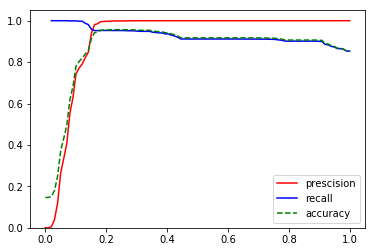

In [100]:
# we test and evaluate the preformance of our random forest
# We now predict a probability that one is a child
y_prob_rf = rfc.predict_proba(X_test) 

# We now change a threshold for prediction and plot the prescision vs the recall
# I believe that the automatic threshold being used above was 0.5 (if its more than 
#     50% likely that one has an implant we classify it as having an implant).

num_samples = int(1e2)
pres = np.zeros(num_samples)
recl = np.zeros(num_samples)
index = 0
x_axis = np.linspace(0, 1, num_samples)
accuracy = []
for threshold in x_axis:
    y_pred = [0 if y_prob_rf[i,1] < threshold else 1 for i in range(len(y_prob_rf))]
    conf = confusion_matrix(y_test, y_pred)
    pres[index] = prescision(conf)
    recl[index] = recall(conf)
    index += 1
    accuracy.append((conf[0,0] + conf[1,1]) / (len(y_pred)))
    
plt.plot(x_axis, pres, 'r', label="prescision")
plt.plot(x_axis, recl, 'b', label='recall')
plt.plot(x_axis, accuracy, 'g--', label="accuracy")

#plt.plot(x_axis, np.ones(len(x_axis)) * 0.83, 'g--')
#plt.plot(x_axis, np.ones(len(x_axis)) * 0.92, 'y--')

plt.ylim(0, 1.05)
plt.legend()
plt.show

indx = 15
print("prescision ", pres[indx], "recall ",recl[indx], "accuracy: ", accuracy[indx])
print("accuracy always guessing there was no nide: ", 1 - sum(y_test) /len(y_test) )

Right now, we see that the classifier preforms very well on data randomly sampled from the days that it was trained on.  However, we now test how it preforms on 2 days that it was not trained on.

/Users/Charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


[[2880   54]
 [ 760  266]] [0,1]false positives, [1,0] false negatives

[0.74090909]  is the accuracy we would have simply guessing that NIDEs never happen

Near an ideal NIDE descision threshold (high recall) we have:
prescision: 0.6738241308793456 recall: 1.0  and accuracy: 0.7583333333333333 

Near another ideal NIDE descision threshold (high prescision) we have:
prescision: 0.9815950920245399 recall: 0.7912087912087912  and accuracy: 0.7944444444444444


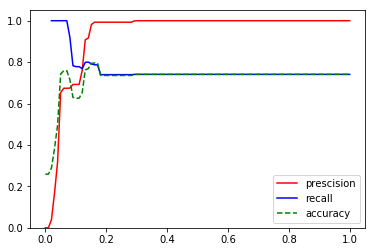

In [57]:
X_final_test = final_test_data[:, :-1]
y_final_test = final_test_data[:, -1:]

# we test and evaluate the preformance of our random forest
# We now predict a probability that one is a child
y_prob_rf = rfc.predict_proba(X_final_test) 

# We now change a threshold for prediction and plot the prescision vs the recall
# I believe that the automatic threshold being used above was 0.5 (if its more than 
#     50% likely that one has an implant we classify it as having an implant).

num_samples = int(1e2)
pres = np.zeros(num_samples)
recl = np.zeros(num_samples)
index = 0
x_axis = np.linspace(0, 1, num_samples)
accuracy = []
for threshold in x_axis:
    y_pred = [0 if y_prob_rf[i,1] < threshold else 1 for i in range(len(y_prob_rf))]
    conf = confusion_matrix(y_final_test, y_pred)
    if (threshold > .15 and threshold < .16):
        print(conf, "[0,1]false positives, [1,0] false negatives\n")
    pres[index] = prescision(conf)
    recl[index] = recall(conf)
    index += 1
    accuracy.append((conf[0,0] + conf[1,1]) / (len(y_pred)))
    
plt.plot(x_axis, pres, 'r', label="prescision")
plt.plot(x_axis, recl, 'b', label='recall')
plt.plot(x_axis, accuracy, 'g--', label="accuracy")

#plt.plot(x_axis, np.ones(len(x_axis)) * 0.83, 'g--')
#plt.plot(x_axis, np.ones(len(x_axis)) * 0.92, 'y--')

plt.ylim(0, 1.05)
plt.legend()
plt.show

print(1 - sum(y_final_test) / len(y_final_test), " is the accuracy we would have simply guessing that NIDEs never happen\n")

indx = 7
print("Near an ideal NIDE descision threshold (high recall) we have:")
print("prescision:", pres[indx], "recall:", recl[indx], " and accuracy:", accuracy[indx], "\n")

indx = 15
print("Near another ideal NIDE descision threshold (high prescision) we have:")
print("prescision:", pres[indx], "recall:", recl[indx], " and accuracy:", accuracy[indx])


In the confusion matrix above we correctly identified 266 times when nides were occuring and 2880 times when they were not.  However, we incorecly predicted that a nide was occuring 54 times and we incorrecly predicted that a nide was not occuring 760 times.

When we look at the plot we see that the accuracy approaches 80% twice, first with a high recall (likely what we want, since false nide alarms are less problematic than missing nides that happen) and secondly with a hight prescision (probably not what we want as we want to catch all the nides).  It appears we can have it either way.

In [58]:
# we pull out the feature importances
# Now we get scores for feature importances for our classifier
print(list_of_features[0:5])
print(rfc.feature_importances_[0:5])
print(list_of_features[5:10])
print(rfc.feature_importances_[5:10])
print(list_of_features[10:])
print(rfc.feature_importances_[10:])

['m_flux', 'd_flux', 'dd_flux', 'bid_flux', 'ask_flux']
[0.02764324 0.17743256 0.03066704 0.2044912  0.18106127]
['m_mlf', 'd_mlf', 'dd_mlf', 'bid_mlf', 'ask_mlf']
[0.12488401 0.01854966 0.01200249 0.01740214 0.01604208]
['m_var', 'd_var', 'dd_var', 'bid_var', 'ask_var']
[0.14649877 0.00236221 0.01787763 0.01215378 0.01093191]


In [84]:
out_data_copy = np.copy(out_data)
out_data_copy = out_data_copy[np.argsort(out_data_copy[:, -1])]
print(out_data_copy[-4400:, -1])
print(out_data_copy[0:24500, -1])

[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]


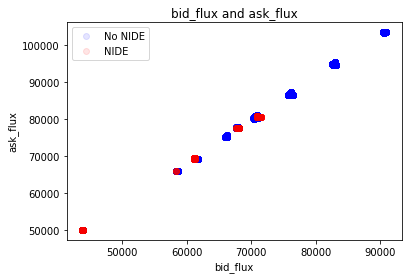

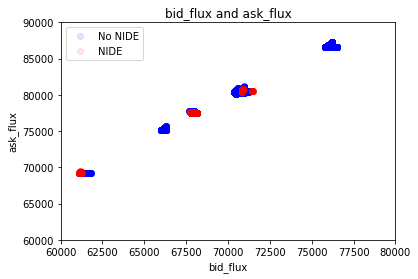

In [91]:
# The most important features seem to be: bid_flux, ask_flux, d_flux, m_var and m_mlf.

plt.plot(out_data_copy[:24500, 3], out_data_copy[:24500, 4], 'bo', alpha=.1, label="No NIDE")
plt.plot(out_data_copy[-4400:, 3], out_data_copy[-4400:, 4], 'ro', alpha=.1, label="NIDE")
plt.title("bid_flux and ask_flux")
plt.xlabel("bid_flux")
plt.ylabel("ask_flux")
plt.legend()
plt.savefig('bid_ask_data_plot.png', bbox_inches='tight')
plt.show()

# Now we zoom in 
plt.plot(out_data_copy[:24500, 3], out_data_copy[:24500, 4], 'bo', alpha=.1, label="No NIDE")
plt.plot(out_data_copy[-4400:, 3], out_data_copy[-4400:, 4], 'ro', alpha=.1, label="NIDE")
plt.title("bid_flux and ask_flux")
plt.xlabel("bid_flux")
plt.ylabel("ask_flux")
plt.xlim(6e4, 8e4)
plt.ylim(6e4, 9e4)
plt.legend()
plt.savefig('bid_ask_data_plot_zoom.png', bbox_inches='tight')
plt.show()

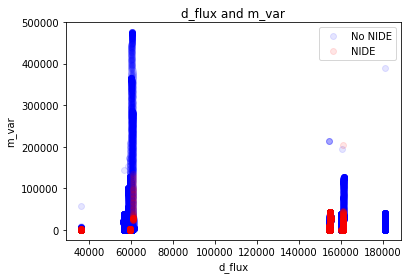

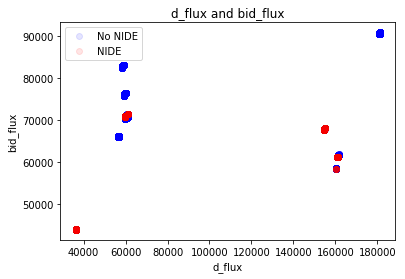

In [95]:
# The most important features seem to be: bid_flux, ask_flux, d_flux, m_var and m_mlf.

plt.plot(out_data_copy[:24500, 1], out_data_copy[:24500, 11], 'bo', alpha=.1, label="No NIDE")
plt.plot(out_data_copy[-4400:, 1], out_data_copy[-4400:, 11], 'ro', alpha=.1, label="NIDE")
plt.title("d_flux and m_var")
plt.xlabel("d_flux")
plt.ylabel("m_var")
plt.legend()
plt.savefig('dflux_mvar_data_plot.png', bbox_inches='tight')
plt.show()

# Now we zoom in 
plt.plot(out_data_copy[:24500, 1], out_data_copy[:24500, 3], 'bo', alpha=.1, label="No NIDE")
plt.plot(out_data_copy[-4400:, 1], out_data_copy[-4400:, 3], 'ro', alpha=.1, label="NIDE")
plt.title("d_flux and bid_flux")
plt.xlabel("d_flux")
plt.ylabel("bid_flux")
plt.legend()
plt.savefig('dflux_bid_data_plot.png', bbox_inches='tight')
plt.show()